# Imports

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.svm import SVC,SVR,LinearSVC,LinearSVR
from sklearn.kernel_approximation import Nystroem
from sklearn import metrics
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ROCAUC

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df = pd.read_csv("./data/HW3_movie_metadata.csv")
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
2,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,Christoph Waltz,...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000
3,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.00,87.00,2.00,318.00,Daphne Zuniga,637.00,NaN,Comedy|Drama,Eric Mabius,...,6.00,English,Canada,NaN,NaN,"2,013.00",470.00,7.70,NaN,84
5039,NaN,43.00,43.00,NaN,319.00,Valorie Curry,841.00,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.00,English,USA,TV-14,NaN,NaN,593.00,7.50,16.00,32000
5040,Benjamin Roberds,13.00,76.00,0.00,0.00,Maxwell Moody,0.00,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.00,English,USA,NaN,"1,400.00","2,013.00",0.00,6.30,NaN,16
5041,Daniel Hsia,14.00,100.00,0.00,489.00,Daniel Henney,946.00,"10,443.00",Comedy|Drama|Romance,Alan Ruck,...,9.00,English,USA,PG-13,NaN,"2,012.00",719.00,6.30,2.35,660


# Preprocessing

dropping na values for imbd_score

In [4]:
df = df.dropna(subset=['imdb_score'])
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
2,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,Christoph Waltz,...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000
3,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.00,87.00,2.00,318.00,Daphne Zuniga,637.00,NaN,Comedy|Drama,Eric Mabius,...,6.00,English,Canada,NaN,NaN,"2,013.00",470.00,7.70,NaN,84
5039,NaN,43.00,43.00,NaN,319.00,Valorie Curry,841.00,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.00,English,USA,TV-14,NaN,NaN,593.00,7.50,16.00,32000
5040,Benjamin Roberds,13.00,76.00,0.00,0.00,Maxwell Moody,0.00,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.00,English,USA,NaN,"1,400.00","2,013.00",0.00,6.30,NaN,16
5041,Daniel Hsia,14.00,100.00,0.00,489.00,Daniel Henney,946.00,"10,443.00",Comedy|Drama|Romance,Alan Ruck,...,9.00,English,USA,PG-13,NaN,"2,012.00",719.00,6.30,2.35,660


Remove the in-between imdb_score of low and high

<AxesSubplot:xlabel='imdb_score', ylabel='count'>

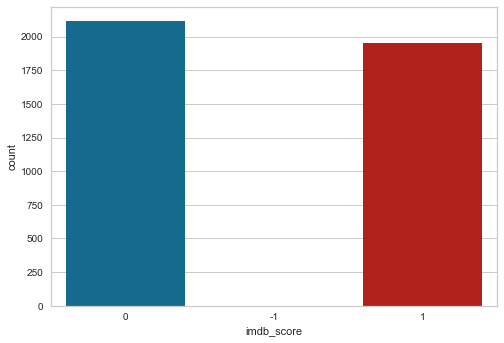

In [5]:
df['imdb_score'] = pd.qcut(df['imdb_score'], [0, 0.4, 0.6, 1], labels=[0,-1,1])
df = df.drop(df[df["imdb_score"] == -1].index)
sns.countplot(x="imdb_score", data=df)

Split train test

In [6]:
to_drop = [
           "actor_1_name",
           "actor_2_name",
           "actor_3_name",
           "movie_imdb_link",
           "movie_title",
           "language",
           "plot_keywords",
           "country",
           "genres",
]
df.drop(to_drop, axis=1, inplace=True)
df.dtypes

director_name                  object
num_critic_for_reviews        float64
duration                      float64
director_facebook_likes       float64
actor_3_facebook_likes        float64
actor_1_facebook_likes        float64
gross                         float64
num_voted_users                 int64
cast_total_facebook_likes       int64
facenumber_in_poster          float64
num_user_for_reviews          float64
content_rating                 object
budget                        float64
title_year                    float64
actor_2_facebook_likes        float64
imdb_score                   category
aspect_ratio                  float64
movie_facebook_likes            int64
dtype: object

In [7]:
directors = ['Steven Spielberg', 'Ridley Scott', 'Martin Scorsese', 'Woody Allen']
process_director_name = lambda x: x if x in directors else "others"
df['director_name'] = df['director_name'].apply(process_director_name)
df["director_name"]

0       others
1       others
3       others
4       others
6       others
         ...  
5036    others
5038    others
5039    others
5040    others
5041    others
Name: director_name, Length: 4067, dtype: object

In [8]:
top_three = ["R","PG", "PG-13"]
process_content_rating = lambda x: x if x in top_three else "others"
df['content_rating'] = df['content_rating'].apply(process_content_rating)
df["content_rating"]

0        PG-13
1        PG-13
3        PG-13
4       others
6        PG-13
         ...  
5036     PG-13
5038    others
5039    others
5040    others
5041     PG-13
Name: content_rating, Length: 4067, dtype: object

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


array([[<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>],
       [<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>,
        <AxesSubplot:title={'center':'num_critic_for_reviews'}>],
       [<AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'title_year'}>, <AxesSubplot:>]],
      dtype=object)

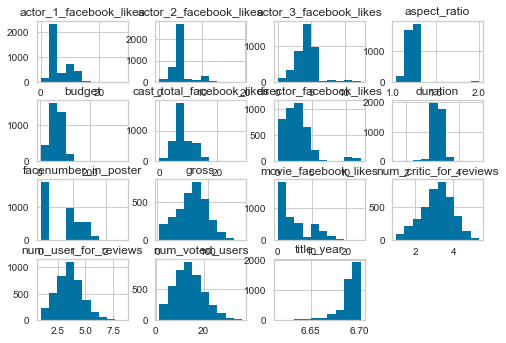

In [9]:
y = df["imdb_score"]
X = df[df.columns.difference(["imdb_score"])]
X[list(X._get_numeric_data().columns)] = X[list(X._get_numeric_data().columns)].pow(1/4)
X.hist()

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,content_rating,director_facebook_likes,director_name,duration,facenumber_in_poster,gross,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
4177,4.27,4.06,3.80,1.17,40.16,5.74,R,1.57,others,3.16,1.00,NaN,3.99,2.85,2.62,8.41,6.69
3775,10.88,4.56,3.06,1.24,47.29,10.99,R,0.00,others,3.22,1.19,41.79,0.00,3.11,4.03,14.97,6.68
2619,6.69,5.22,4.95,1.24,23.40,8.14,R,0.00,others,3.17,0.00,82.80,10.47,4.22,5.87,19.93,6.67
1724,4.14,2.90,2.72,1.17,NaN,4.83,others,1.19,others,3.09,1.63,NaN,0.00,2.74,2.03,9.80,6.69
543,4.40,3.38,0.00,NaN,NaN,4.74,others,NaN,others,2.59,1.00,NaN,0.00,1.86,2.86,13.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4130,4.56,4.46,4.35,NaN,41.62,6.63,R,1.97,others,3.13,1.19,8.41,4.60,2.14,1.93,6.91,6.69
2174,6.69,5.07,4.73,1.24,66.87,8.07,R,0.00,others,3.40,0.00,86.76,16.97,4.94,5.13,25.74,6.70
3507,5.30,4.69,4.31,2.00,NaN,6.96,others,NaN,others,2.78,1.00,NaN,0.00,2.28,3.02,14.35,NaN
1138,10.24,5.62,5.34,1.17,81.44,10.75,PG-13,3.15,others,3.38,1.00,116.45,0.00,3.30,4.05,21.50,6.68


In [11]:
X_train_median = X_train.select_dtypes(include='number').median()
X_train = X_train.fillna(X_train_median)
X_test = X_test.fillna(X_train_median)
X_train.isna().sum() + X_test.isna().sum()

actor_1_facebook_likes       0
actor_2_facebook_likes       0
actor_3_facebook_likes       0
aspect_ratio                 0
budget                       0
cast_total_facebook_likes    0
content_rating               0
director_facebook_likes      0
director_name                0
duration                     0
facenumber_in_poster         0
gross                        0
movie_facebook_likes         0
num_critic_for_reviews       0
num_user_for_reviews         0
num_voted_users              0
title_year                   0
dtype: int64

In [12]:
def one_hot_encode(X):
    X_copy = X.copy()
    cols = X_copy.select_dtypes(include=["object"]).columns
    for col in cols:
        X_copy = pd.concat([X_copy, pd.get_dummies(X_copy[col], prefix=col)], axis=1)
        X_copy.drop(col, axis=1, inplace=True)
    return X_copy
X_train = one_hot_encode(X_train)
X_test = one_hot_encode(X_test)
X_train

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,...,title_year,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_others,director_name_Martin Scorsese,director_name_Ridley Scott,director_name_Steven Spielberg,director_name_Woody Allen,director_name_others
4177,4.27,4.06,3.80,1.17,40.16,5.74,1.57,3.16,1.00,70.88,...,6.69,0,0,1,0,0,0,0,0,1
3775,10.88,4.56,3.06,1.24,47.29,10.99,0.00,3.22,1.19,41.79,...,6.68,0,0,1,0,0,0,0,0,1
2619,6.69,5.22,4.95,1.24,23.40,8.14,0.00,3.17,0.00,82.80,...,6.67,0,0,1,0,0,0,0,0,1
1724,4.14,2.90,2.72,1.17,66.02,4.83,1.19,3.09,1.63,70.88,...,6.69,0,0,0,1,0,0,0,0,1
543,4.40,3.38,0.00,1.24,66.02,4.74,2.62,2.59,1.00,70.88,...,6.69,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4130,4.56,4.46,4.35,1.24,41.62,6.63,1.97,3.13,1.19,8.41,...,6.69,0,0,1,0,0,0,0,0,1
2174,6.69,5.07,4.73,1.24,66.87,8.07,0.00,3.40,0.00,86.76,...,6.70,0,0,1,0,0,0,0,0,1
3507,5.30,4.69,4.31,2.00,66.02,6.96,2.62,2.78,1.00,70.88,...,6.69,0,0,0,1,0,0,0,0,1
1138,10.24,5.62,5.34,1.17,81.44,10.75,3.15,3.38,1.00,116.45,...,6.68,0,1,0,0,0,0,0,0,1


# Model

### Model 1: All features

In [17]:
clf1 = SVC(kernel='rbf', cache_size=1000)
clf1.fit(X_train, y_train)
y_train_pred = clf1.predict(X_train)
y_test_pred = clf1.predict(X_test)
y_test_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.86      0.81       443
           1       0.81      0.68      0.74       371

    accuracy                           0.78       814
   macro avg       0.79      0.77      0.78       814
weighted avg       0.78      0.78      0.78       814



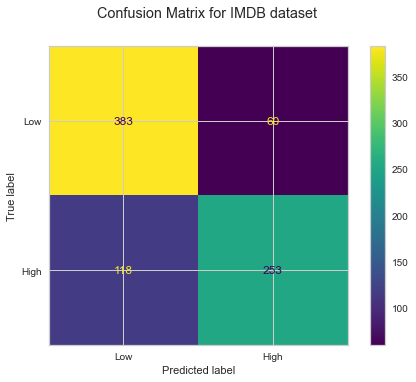

In [20]:
print("Classification Report: \n", metrics.classification_report(y_test, y_test_pred))
fig=metrics.plot_confusion_matrix(clf1, X_test, y_test,display_labels=["Low","High"])
fig.figure_.suptitle("Confusion Matrix for IMDB dataset")
plt.show()

In [39]:
X_train.shape

(3253, 24)

In [41]:
y_train.shape

(3253,)

In [38]:
X_test.shape

(814, 24)

In [37]:
y_test.astype(int).shape

(814,)

In [45]:
visualizer = ROCAUC(clf1, classes=["Low","High"])
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test.astype(int))        
visualizer.show()  

ValueError: Found input variables with inconsistent numbers of samples: [1628, 814]